In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
%config InlineBackend.figure_format = 'retina'
import random
import os
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8.09016994375, 5.0)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 25.0
matplotlib.rcParams['legend.fontsize'] = 16.0
matplotlib.rcParams['font.family']= 'Times New Roman'
matplotlib.rcParams['font.sans-serif']= ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['mathtext.fontset']= 'stixsans'

## Definitions

In [3]:
def lambdatilde(lambda1,lambda2,m1,m2):
    mtotal = m1+m2
    m1fac=m1+12*m2
    m2fac=m2+12*m1
    return 16./13*(m1fac*m1**(4)*lambda1+m2fac*m2**(4)*lambda2)/mtotal**(5)

def F_n(q,n):
    return (1-q**(10/(3-n)))/(1+q**(10/(3-n)))
    #return (1 - np.power(q, 10./(3-n)))/(1 + np.power(q, 10./(3-n)))

a=0.100784
b11= -2.97568
b12=1.11361
b21= 13.8791
b22= -4.21877
b31= -20.805
b32=18.0038
c11= -2.72449
c12=0.778517
c21=10.5153
c22= 0.907055
c31= -9.6157
c32=-2.04165

a_err=0.0301849
b11_err=0.597947
b12_err=0.435205
b21_err=1.51432
b22_err=2.61011
b31_err=0.738146
b32_err=0.798597
c11_err=0.535106
c12_err=0.528731
c21_err=0.834321
c22_err=4.86418
c31_err=4.00367
c32_err=8.992

# a=0.0755
# b11= -2.235
# b12=0.8474
# b21= 10.45
# b22= -3.251
# b31= -15.70
# b32=13.61
# c11= -2.048
# c12=0.5976

# c21=7.941
# c22= 0.5658
# c31= -7.360
# c32= -1.320

def binary_love(q_v,lambdas_v,n_v):
    num = a+b11*q_v*lambdas_v**(-1./5)+b12*q_v*q_v*lambdas_v**(-1./5)+b21*q_v*lambdas_v**(-2./5)\
    +b22*q_v*q_v*lambdas_v**(-2./5)+b31*q_v*lambdas_v**(-3./5)+b32*q_v*q_v*lambdas_v**(-3./5)
    den = a+c11*q_v*lambdas_v**(-1./5)+c12*q_v*q_v*lambdas_v**(-1./5)+c21*q_v*lambdas_v**(-2./5)\
    +c22*q_v*q_v*lambdas_v**(-2./5)+c31*q_v*lambdas_v**(-3./5)+c32*q_v*q_v*lambdas_v**(-3./5)
    
    return F_n(q_v,n_v)*lambdas_v*num/den

def binary_love_unc(q_v,lambdas_v,n_v,b):
    num = b[0]+b[1]*q_v*lambdas_v**(-1./5)+b[2]*q_v*q_v*lambdas_v**(-1./5)+b[3]*q_v*lambdas_v**(-2./5)\
    +b[4]*q_v*q_v*lambdas_v**(-2./5)+b[5]*q_v*lambdas_v**(-3./5)+b[6]*q_v*q_v*lambdas_v**(-3./5)
    den = b[0]+b[7]*q_v*lambdas_v**(-1./5)+b[8]*q_v*q_v*lambdas_v**(-1./5)+b[9]*q_v*lambdas_v**(-2./5)\
    +b[10]*q_v*q_v*lambdas_v**(-2./5)+b[11]*q_v*lambdas_v**(-3./5)+b[12]*q_v*q_v*lambdas_v**(-3./5)
    
    return F_n(q_v,n_v)*lambdas_v*num/den

## Suggestions for Fig.1 in the paper (representations of the relation)


In [4]:
def FitFucLambdasmean(x):
    return 137.12527389/x/x-32.80266127/x+0.51686373

def FitFucLambdasstd(x):
    return -7.38541865e-05*x*np.sqrt(x)+1.03777889e-02*x+4.58171653e-01*np.sqrt(x)-8.34191255e-01

def FitFucqstd(x):
    return -201.43239619*x*x+273.92682761*x-71.23422462

def FitFucqmean(x):
    return -11.27652805*x*x+14.94995435*x-4.66388505

# Fits for the mean and stdev of the residual gaussian

## Let's start with the relative error

In [5]:
# Parameter order: q, lambda_s, lambda_a, residual, relative residual
ResidualsC=np.genfromtxt("UniversalRelationsResidualsConstrained.dat")
ResidualsUnC=np.genfromtxt("UniversalRelationsResidualsUnConstrained.dat")
ResidualsP=np.genfromtxt("UniversalRelationsResidualsPosterior.dat")

In [6]:
ResidualsUnC[:]

array([[ 4.76402192e-01,  1.19906122e+03,  1.17414090e+03,
        -6.02061909e+00, -5.12768023e-03],
       [ 9.89566853e-01,  1.91833378e+03,  5.38371075e+01,
         2.29878138e+00,  4.26988277e-02],
       [ 6.09929722e-01,  3.78555363e+02,  3.46505458e+02,
        -1.13660207e+01, -3.28018519e-02],
       ...,
       [ 8.16979922e-01,  3.97574621e+02,  2.13317751e+02,
        -5.76008471e+00, -2.70023694e-02],
       [ 9.17643468e-01,  8.31002133e+02,  1.84548760e+02,
        -7.51278973e+00, -4.07089688e-02],
       [ 9.31529160e-01,  6.85870537e+02,  1.28528650e+02,
        -5.87799299e+00, -4.57329395e-02]])

In [7]:
ResidualsUnC[:,3]

array([ -6.02061909,   2.29878138, -11.36602072, ...,  -5.76008471,
        -7.51278973,  -5.87799299])

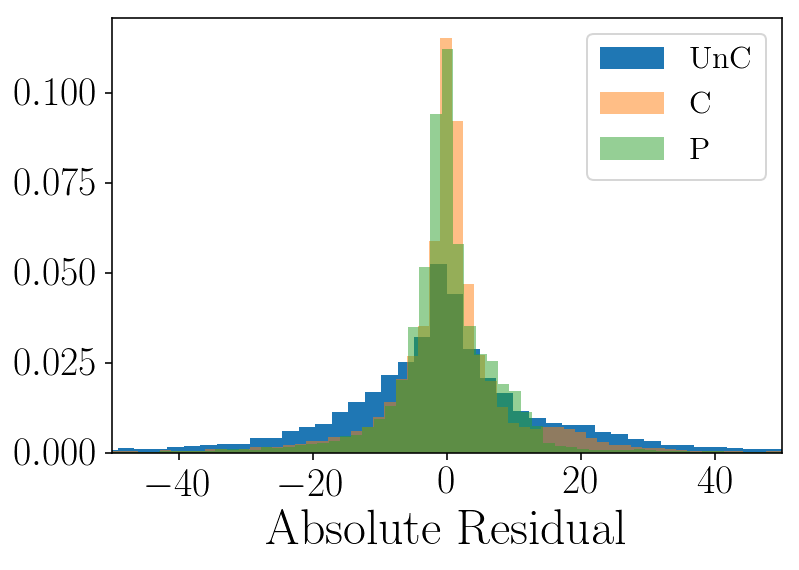

In [8]:
plt.hist(ResidualsUnC[:,3],bins=100,label='UnC',density=True)
plt.hist(ResidualsC[:,3],bins=100,label='C',alpha=0.5,density=True)
plt.hist(ResidualsP[:,3],bins=100,label='P',alpha=0.5,density=True)
plt.legend()
plt.xlim(-50,50)
plt.xlabel('Absolute Residual')
plt.show()

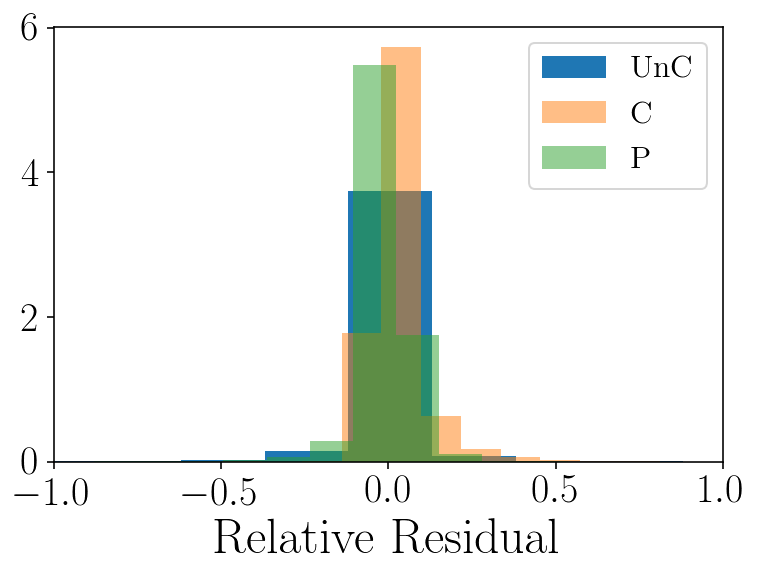

In [9]:
plt.hist(ResidualsUnC[:,4],bins=100,label='UnC',density=True)
plt.hist(ResidualsC[:,4],bins=100,label='C',alpha=0.5,density=True)
plt.hist(ResidualsP[:,4],bins=100,label='P',alpha=0.5,density=True)
plt.legend()
plt.xlim(-1,1)
plt.xlabel('Relative Residual')
plt.show()

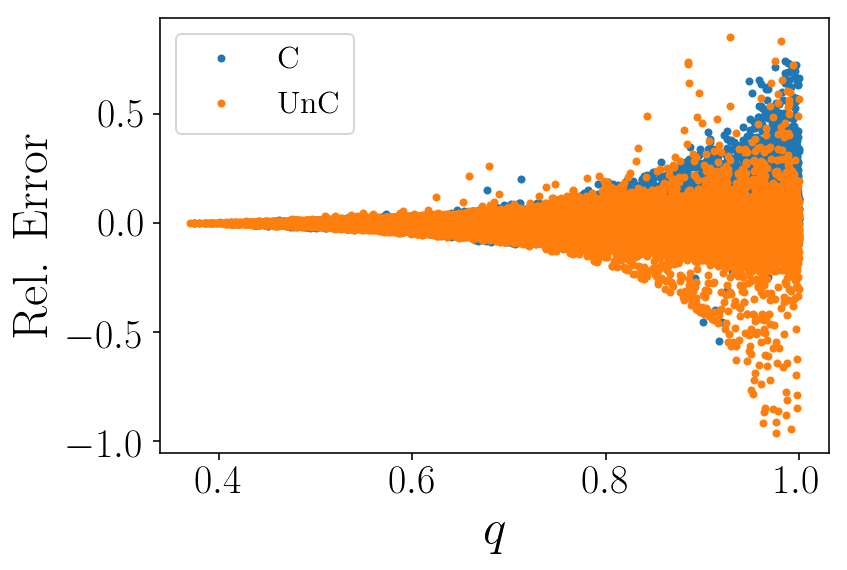

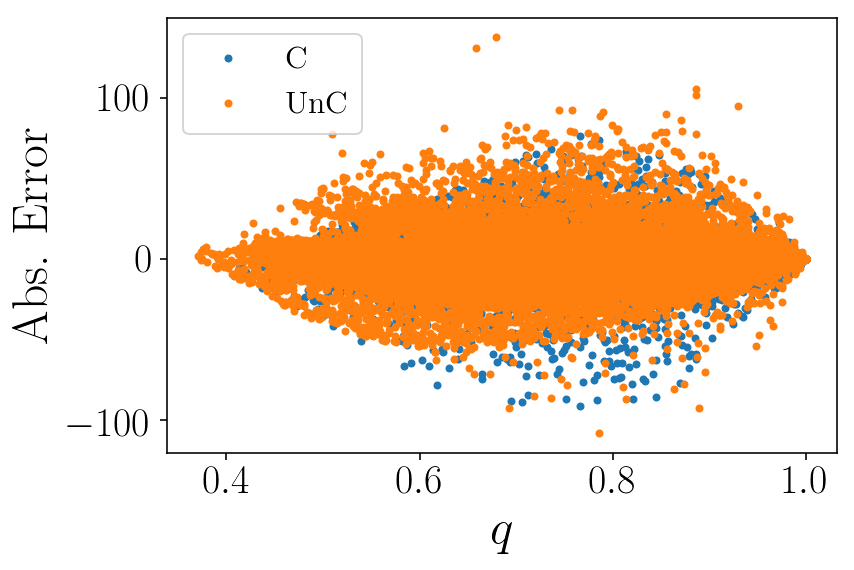

In [10]:
plt.plot(ResidualsC[:,0][np.fabs(ResidualsC[:,4])<1],ResidualsC[:,4][np.fabs(ResidualsC[:,4])<1],'.',label='C')
plt.plot(ResidualsUnC[:,0][np.fabs(ResidualsUnC[:,4])<1],ResidualsUnC[:,4][np.fabs(ResidualsUnC[:,4])<1],'.',label='UnC')
plt.xlabel('$q$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

plt.plot(ResidualsC[:,0],ResidualsC[:,3],'.',label='C')
plt.plot(ResidualsUnC[:,0],ResidualsUnC[:,3],'.',label='UnC')
plt.xlabel('$q$')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

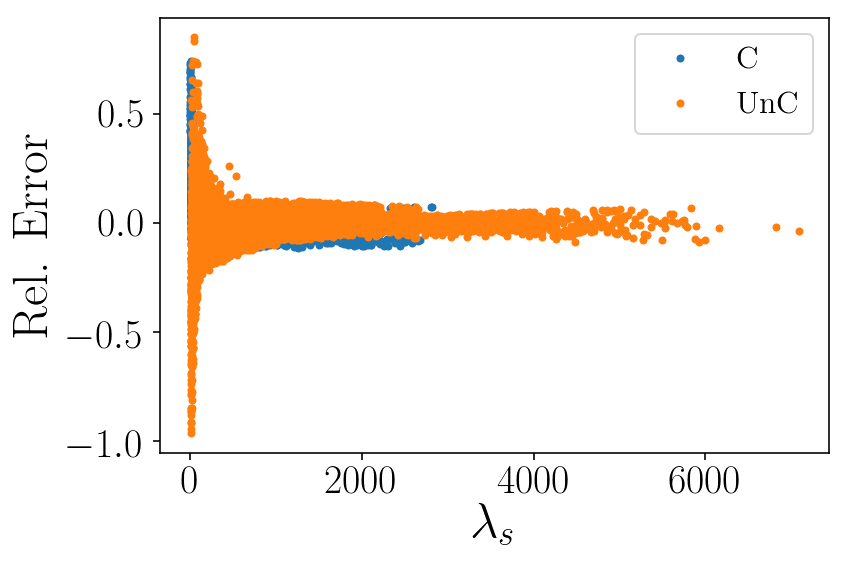

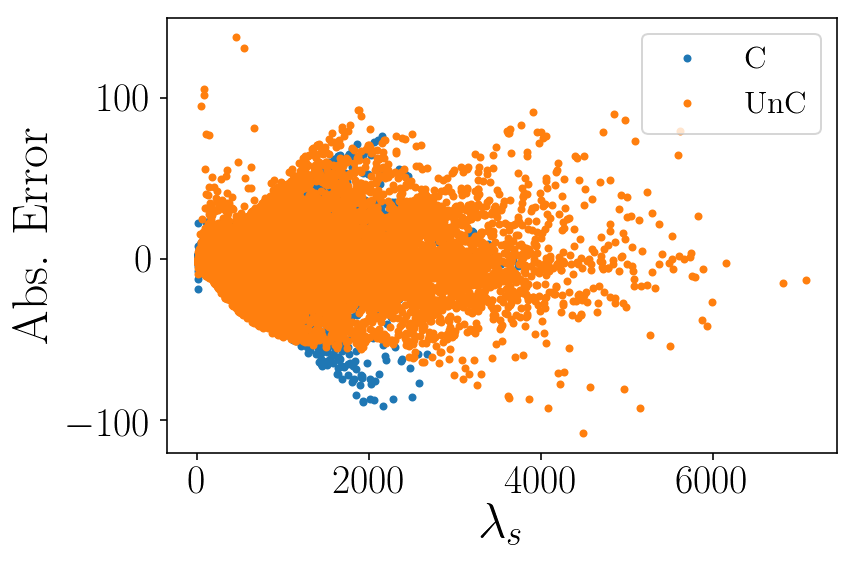

In [11]:
plt.plot(ResidualsC[:,1][np.fabs(ResidualsC[:,4])<1],ResidualsC[:,4][np.fabs(ResidualsC[:,4])<1],'.',label='C')
plt.plot(ResidualsUnC[:,1][np.fabs(ResidualsUnC[:,4])<1],ResidualsUnC[:,4][np.fabs(ResidualsUnC[:,4])<1],'.',label='UnC')
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()


plt.plot(ResidualsC[:,1],ResidualsC[:,3],'.',label='C')
plt.plot(ResidualsUnC[:,1],ResidualsUnC[:,3],'.',label='UnC')
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

In [12]:
ResidualsUnC

array([[ 4.76402192e-01,  1.19906122e+03,  1.17414090e+03,
        -6.02061909e+00, -5.12768023e-03],
       [ 9.89566853e-01,  1.91833378e+03,  5.38371075e+01,
         2.29878138e+00,  4.26988277e-02],
       [ 6.09929722e-01,  3.78555363e+02,  3.46505458e+02,
        -1.13660207e+01, -3.28018519e-02],
       ...,
       [ 8.16979922e-01,  3.97574621e+02,  2.13317751e+02,
        -5.76008471e+00, -2.70023694e-02],
       [ 9.17643468e-01,  8.31002133e+02,  1.84548760e+02,
        -7.51278973e+00, -4.07089688e-02],
       [ 9.31529160e-01,  6.85870537e+02,  1.28528650e+02,
        -5.87799299e+00, -4.57329395e-02]])

/home/zack/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zack/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/zack/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/zack/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/zack/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


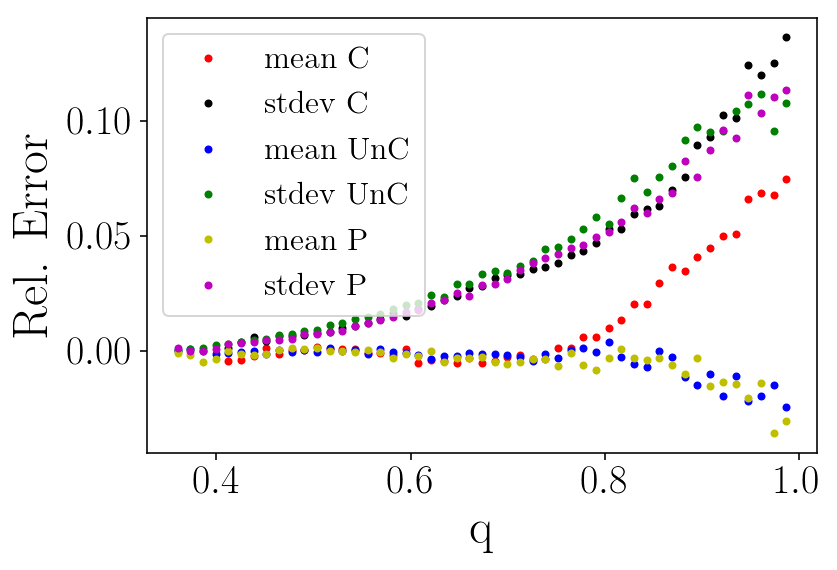

In [13]:
qbin=np.linspace(0.36,1,50)
Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsC1000=ResidualsC[ResidualsC[:,1]<1000]
ResidualsC1000=ResidualsC
for i in range(len(qbin)-1):
    Reslelt=ResidualsC1000[:,4][ResidualsC1000[:,0]>qbin[i]]
    qleft=ResidualsC1000[:,0][ResidualsC1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='r',label='mean C')
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='stdev C')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsUnC1000=ResidualsUnC[ResidualsUnC[:,1]<1000]
ResidualsUnC1000=ResidualsUnC
for i in range(len(qbin)-1):
    Reslelt=ResidualsUnC1000[:,4][ResidualsUnC1000[:,0]>qbin[i]]
    qleft=ResidualsUnC1000[:,0][ResidualsUnC1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='b',label='mean UnC')
plt.plot(qbin[:-1], Resqbinstd,'.',color='g',label='stdev UnC')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
#ResidualsP1000=ResidualsP[ResidualsP[:,1]<1000]
ResidualsP1000=ResidualsP
for i in range(len(qbin)-1):
    Reslelt=ResidualsP1000[:,4][ResidualsP1000[:,0]>qbin[i]]
    qleft=ResidualsP1000[:,0][ResidualsP1000[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='y',label='mean P')
plt.plot(qbin[:-1], Resqbinstd,'.',color='m',label='stdev P')


plt.xlabel('q')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

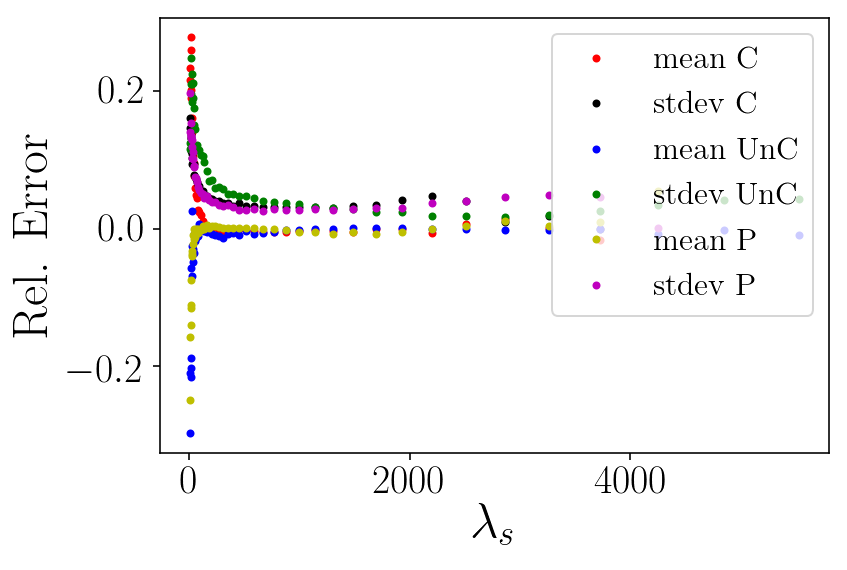

In [14]:
lambdasbin=np.logspace(1,3.8,50)
Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsC[:,4][ResidualsC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsC[:,1][ResidualsC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='r',label='mean C')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='stdev C')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsUnC[:,4][ResidualsUnC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsUnC[:,1][ResidualsUnC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='b',label='mean UnC')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='g',label='stdev UnC')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsP[:,4][ResidualsP[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsP[:,1][ResidualsP[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslelt=Reslelt[np.fabs(Reslelt)<0.5]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='y',label='mean P')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='m',label='stdev P')

plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error')
plt.legend()
plt.show()

In [15]:
from scipy.optimize import curve_fit

In [16]:
lambdasbin[:],Reslambdasbinmean[:]

(array([  10.        ,   11.40624924,   13.01025217,   14.83981789,
          16.92666615,   19.30697729,   22.0220195 ,   25.11886432,
          28.6512027 ,   32.68027589,   37.2759372 ,   42.51786303,
          48.49693429,   55.31681198,   63.09573445,   71.9685673 ,
          82.0891416 ,   93.63292088,  106.80004325,  121.8187912 ,
         138.94954944,  158.48931925,  180.7768677 ,  206.19860095,
         235.19526351,  268.26957953,  305.99496872,  349.0254879 ,
         398.10717055,  454.0909611 ,  517.94746792,  590.78379116,
         673.8627168 ,  768.62461004,  876.7123873 , 1000.        ,
        1140.62492385, 1301.02521691, 1483.98178897, 1692.66661504,
        1930.69772888, 2202.20194999, 2511.88643151, 2865.12026966,
        3268.02758941, 3727.59372031, 4251.78630338, 4849.69342853,
        5531.68119762, 6309.5734448 ]),
 [-0.2484937412023959,
  -0.15744837603570772,
  -0.13986682888857999,
  -0.11552469216592684,
  -0.11145474018079919,
  -0.07420665877977947,
 

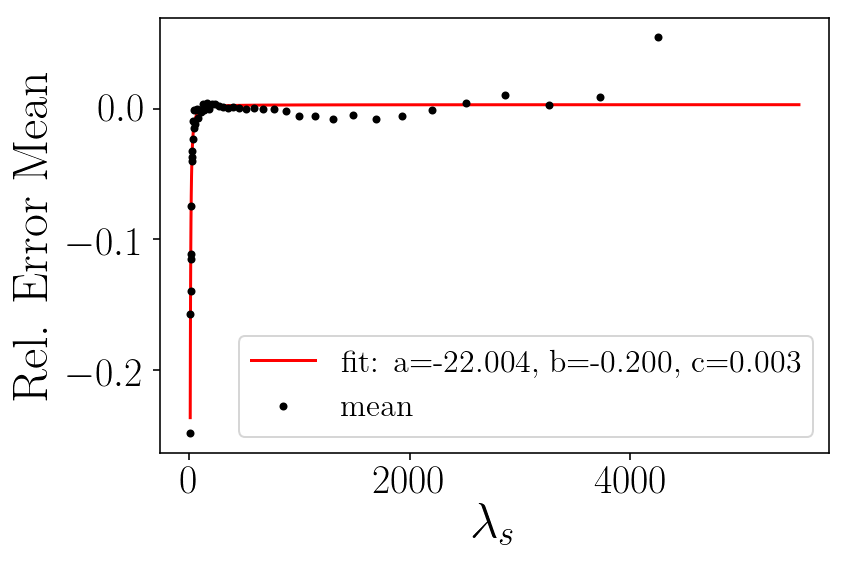

In [17]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[:-3], Reslambdasbinmean[:-2])
plt.plot(lambdasbin[:-1], FitFunc(lambdasbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error Mean')
plt.show()

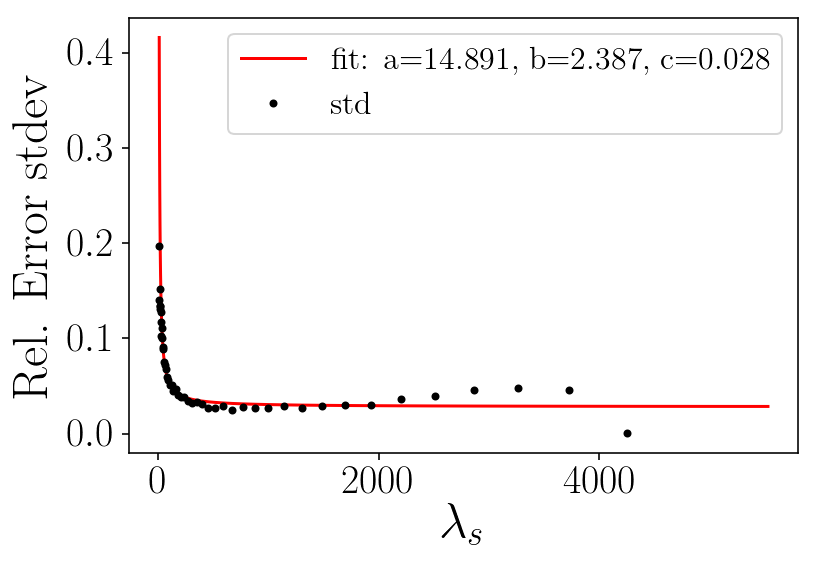

In [18]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[10:-3], Reslambdasbinstd[10:-2])
plt.plot(lambdasbin[:-1], np.fabs(FitFunc(lambdasbin[:-1], *popt)), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='std')
plt.xlabel('$\lambda_s$')
plt.ylabel('Rel. Error stdev')
plt.legend()
plt.show()

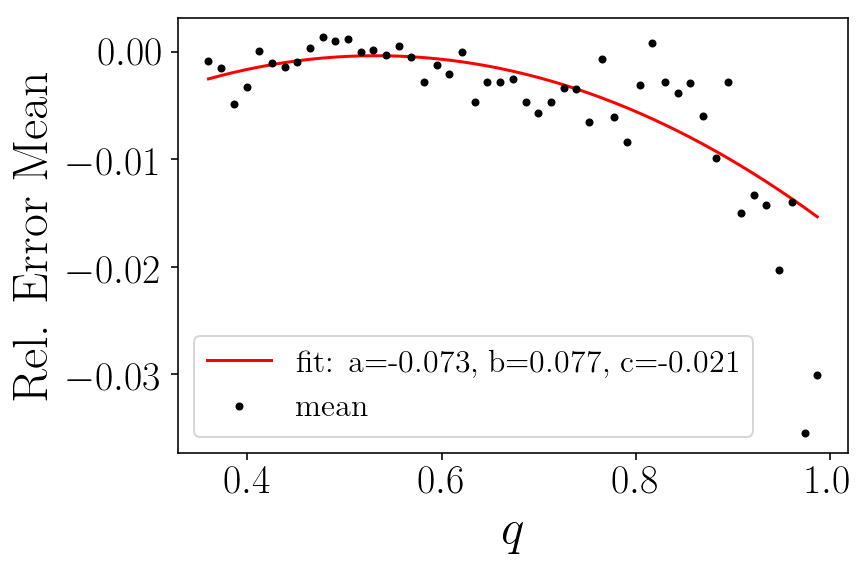

In [19]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-3], Resqbinmean[:-2])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Rel. Error Mean')
plt.show()

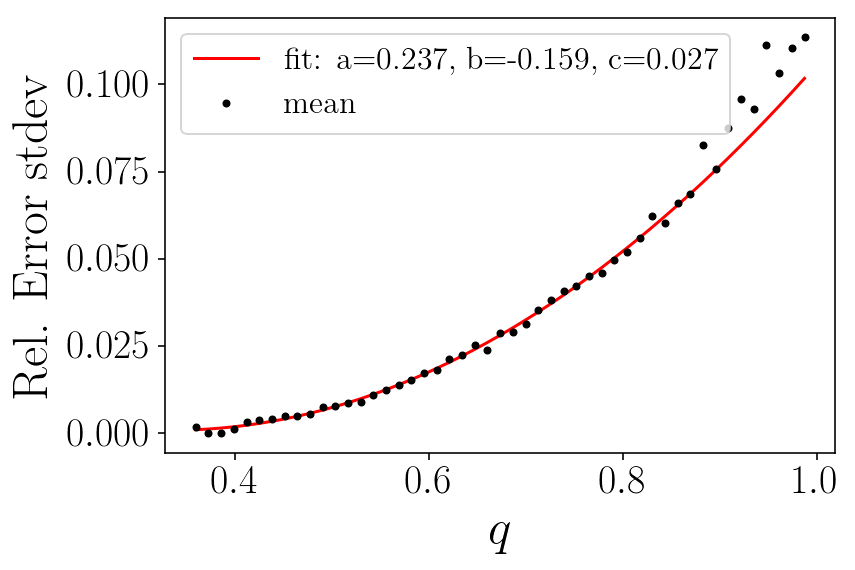

In [20]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-10], Resqbinstd[:-9])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Rel. Error stdev')
plt.show()

## Now with the absolute error

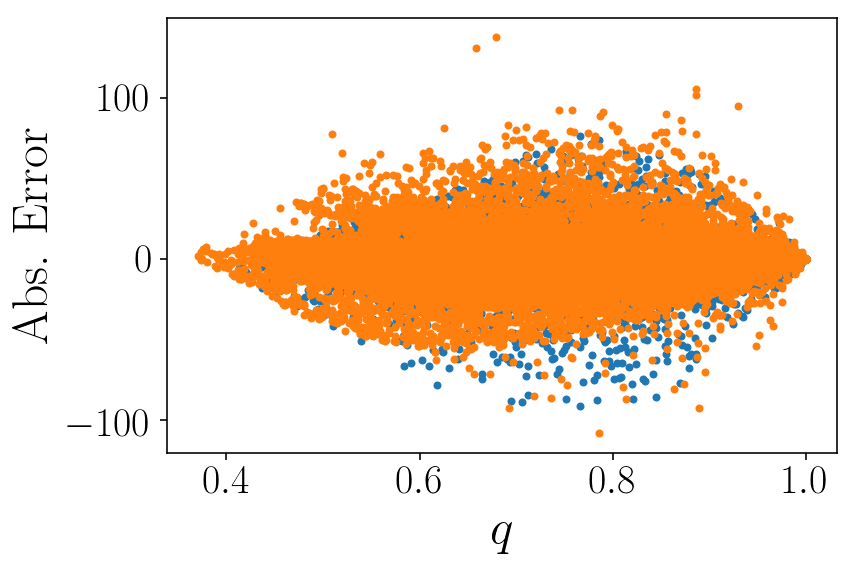

In [21]:
plt.plot(ResidualsC[:,0],ResidualsC[:,3],'.')
plt.plot(ResidualsUnC[:,0],ResidualsUnC[:,3],'.')
plt.xlabel('$q$')
plt.ylabel('Abs. Error')
plt.show()

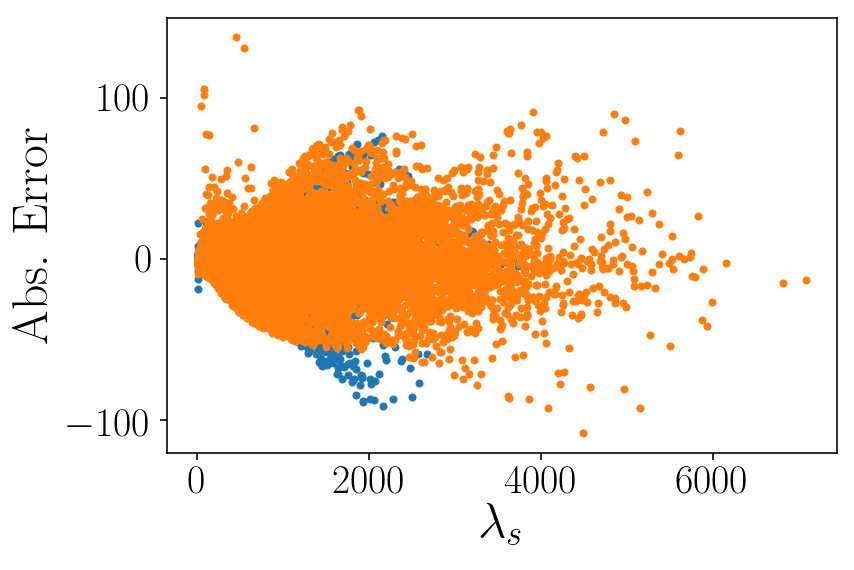

In [22]:
plt.plot(ResidualsC[:,1],ResidualsC[:,3],'.')
plt.plot(ResidualsUnC[:,1],ResidualsUnC[:,3],'.')
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.show()

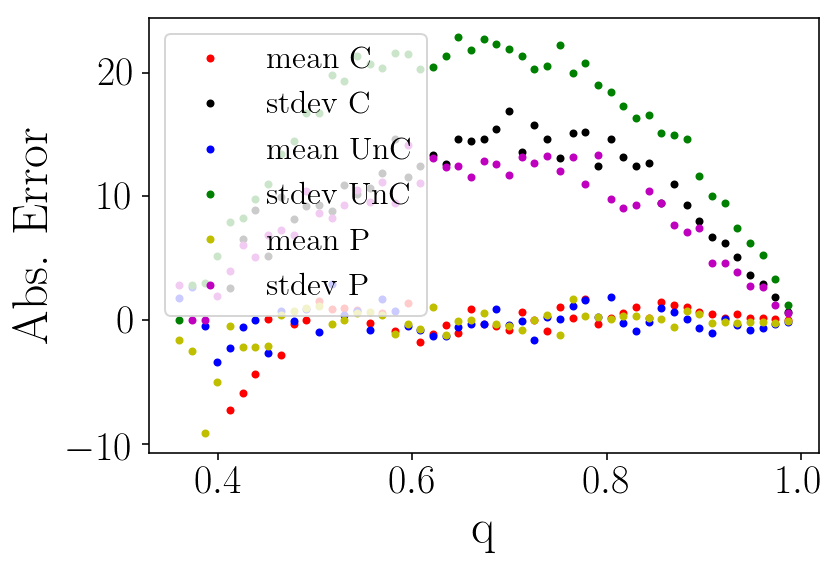

In [23]:
qbin=np.linspace(0.36,1,50)
Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in range(len(qbin)-1):
    Reslelt=ResidualsC[:,3][ResidualsC[:,0]>qbin[i]]
    qleft=ResidualsC[:,0][ResidualsC[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='r',label='mean C')
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='stdev C')
a=np.array((qbin[:-1],lambdasbin[:-1],Resqbinstd)).T
np.savetxt('residualsC.dat', a, fmt='%f')

Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in range(len(qbin)-1):
    Reslelt=ResidualsUnC[:,3][ResidualsUnC[:,0]>qbin[i]]
    qleft=ResidualsUnC[:,0][ResidualsUnC[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='b',label='mean UnC')
plt.plot(qbin[:-1], Resqbinstd,'.',color='g',label='stdev UnC')
b=np.array((qbin[:-1],lambdasbin[:-1],Resqbinstd)).T
np.savetxt('residualsUnC.dat', b, fmt='%f')
           
Resqbin={}
Resqbinmean=[]
Resqbinstd=[]
for i in range(len(qbin)-1):
    Reslelt=ResidualsP[:,3][ResidualsP[:,0]>qbin[i]]
    qleft=ResidualsP[:,0][ResidualsP[:,0]>qbin[i]]
    Reslelt=Reslelt[qleft<qbin[i+1]]
    #Reslelt=Reslelt[np.fabs(Reslelt)<1]
    Resqbin[i]= Reslelt
    Resqbinmean.append(np.mean(Resqbin[i]))
    Resqbinstd.append(np.std(Resqbin[i]))
plt.plot(qbin[:-1], Resqbinmean,'.',color='y',label='mean P')
plt.plot(qbin[:-1], Resqbinstd,'.',color='m',label='stdev P')
c=np.array((qbin[:-1],lambdasbin[:-1],Resqbinstd)).T
np.savetxt('residualsP.dat', c, fmt='%f')

plt.xlabel('q')
plt.ylabel('Abs. Error')
plt.legend()
plt.show()

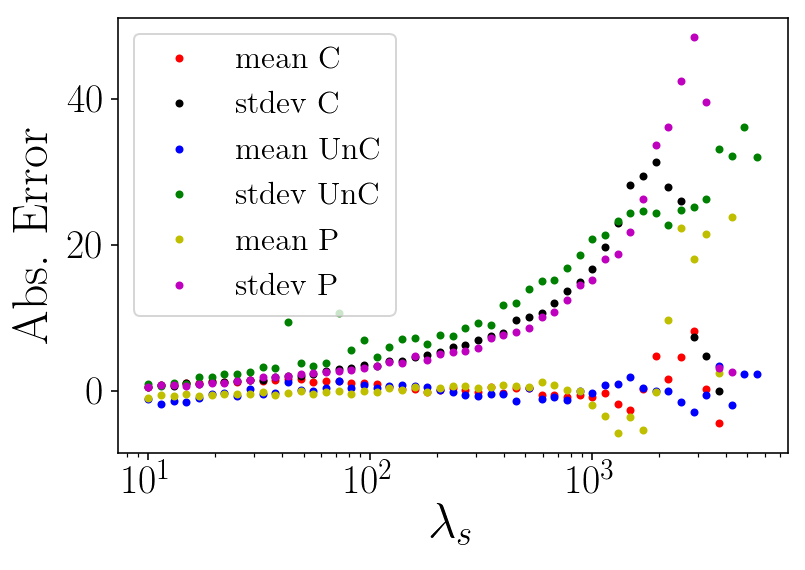

In [24]:
lambdasbin=np.logspace(1,3.8,50)
Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsC[:,3][ResidualsC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsC[:,1][ResidualsC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='r',label='mean C')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='k',label='stdev C')

Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsUnC[:,3][ResidualsUnC[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsUnC[:,1][ResidualsUnC[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='b',label='mean UnC')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='g',label='stdev UnC')


Reslambdasbin={}
Reslambdasbinmean=[]
Reslambdasbinstd=[]
for i in range(len(lambdasbin)-1):
    Reslelt=ResidualsP[:,3][ResidualsP[:,1]>lambdasbin[i]]
    lambdasleft=ResidualsP[:,1][ResidualsP[:,1]>lambdasbin[i]]
    Reslelt=Reslelt[lambdasleft<lambdasbin[i+1]]
    Reslambdasbin[i]= Reslelt
    Reslambdasbinmean.append(np.mean(Reslambdasbin[i]))
    Reslambdasbinstd.append(np.std(Reslambdasbin[i]))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='y',label='mean P')
plt.plot(lambdasbin[:-1], Reslambdasbinstd,'.',color='m',label='stdev P')

plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error')
plt.xscale('log')
plt.legend()
plt.show()

In [25]:
from scipy.optimize import curve_fit

In [31]:
Reslambdasbinmean

[-0.9103316507423111,
 -0.533012249716814,
 -0.6946971349995877,
 -0.4599179680534064,
 -0.6731486640882495,
 -0.5562002100621827,
 -0.4589113787535104,
 -0.4556801108598428,
 -0.43047394830693986,
 -0.18402692028735565,
 -0.5618889477629627,
 -0.2499660300130617,
 -0.058837963367775796,
 -0.4681911975645659,
 -0.10416139014256467,
 0.026777194956527563,
 -0.3755122781872802,
 -0.045946674016044915,
 -0.09571933500422498,
 0.37923205517574166,
 0.09637697216583803,
 0.5356728890414844,
 -0.07843791326612869,
 0.46187613811601724,
 0.7318342574294671,
 0.6876641880928195,
 0.4743622750941524,
 0.5675124999407877,
 0.8937014508694172,
 0.6931444657913518,
 0.5477676434386135,
 1.2791580016152755,
 0.766407000896437,
 0.10516985227991,
 0.008840996193872557,
 -1.8949925927599374,
 -3.403425205146841,
 -5.721353629819474,
 -3.5424675719280585,
 -5.29124984841367,
 -0.10669842098037899,
 9.666160075121619,
 22.356231431451484,
 18.063857542836992,
 21.4681119642157,
 2.507248510517215,
 23.

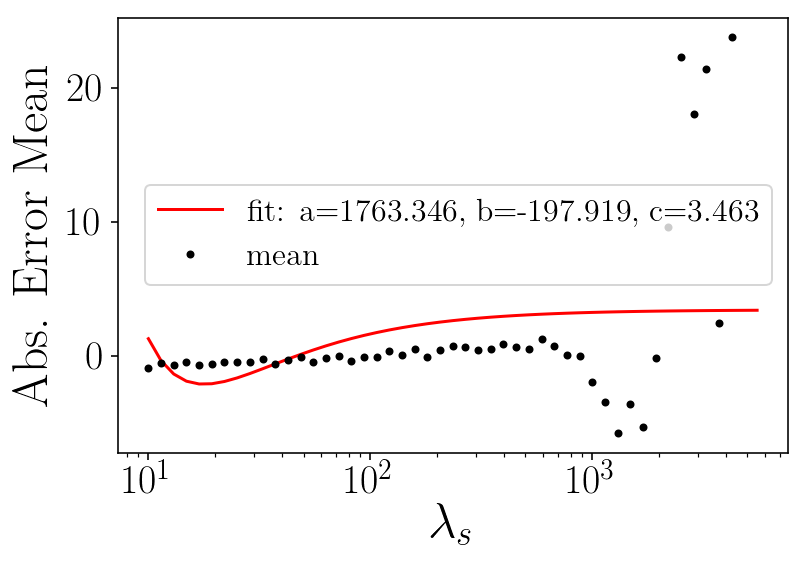

[1763.34598439 -197.9194111     3.46254208]


In [27]:
def FitFunc(x, a, b,c):
    return a/x/x+b/x+c
popt, pcov = curve_fit(FitFunc, lambdasbin[:-3], Reslambdasbinmean[:-2])
plt.plot(lambdasbin[:-1], FitFunc(lambdasbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-1], Reslambdasbinmean,'.',color='k',label='mean')
plt.legend()
plt.xlabel('$\lambda_s$')
plt.ylabel('Abs. Error Mean')
plt.xscale('log')
plt.show()

print(popt)

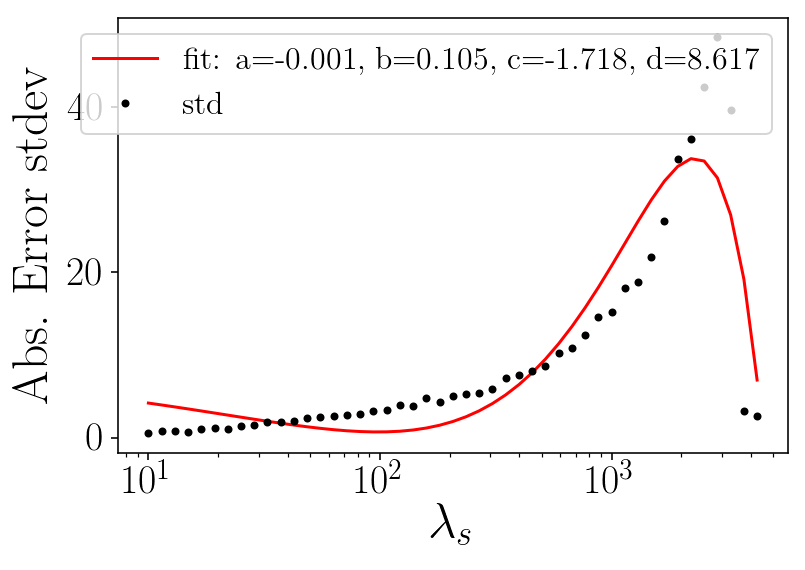

[-1.20727733e-03  1.04685210e-01 -1.71814939e+00  8.61686465e+00]


In [28]:
def FitFunc(x, a, b,c,d):
    return a*x*np.sqrt(x)+b*x+c*np.sqrt(x)+d
popt, pcov = curve_fit(FitFunc, lambdasbin[:-3], Reslambdasbinstd[:-2])
plt.plot(lambdasbin[:-3], np.fabs(FitFunc(lambdasbin[:-3], *popt)), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(lambdasbin[:-3], Reslambdasbinstd[:-2],'.',color='k',label='std')
plt.xlabel('$\lambda_s$')
#plt.xlim(0,300)
plt.ylabel('Abs. Error stdev')
plt.xscale('log')
plt.legend()
plt.show()

print(popt)

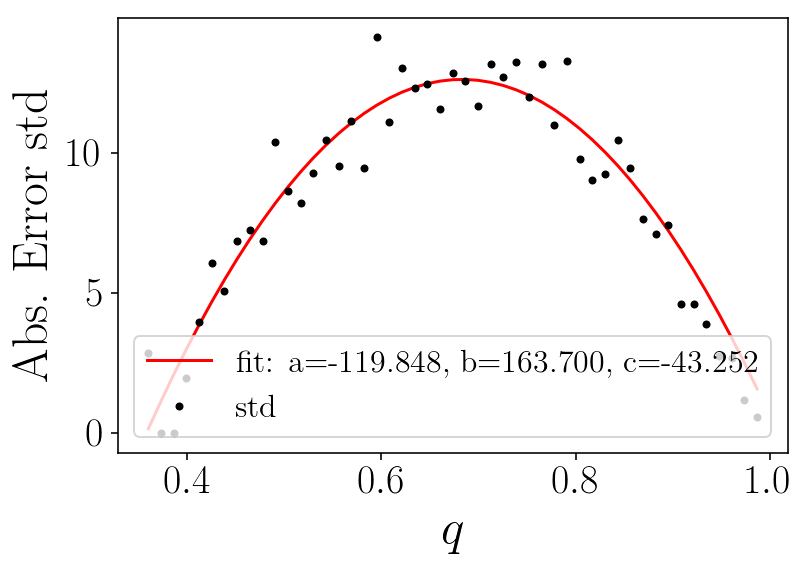

[-119.84757552  163.7000163   -43.25237353]


In [29]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-10], Resqbinstd[:-9])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinstd,'.',color='k',label='std')
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Abs. Error std')
plt.show()

print(popt)

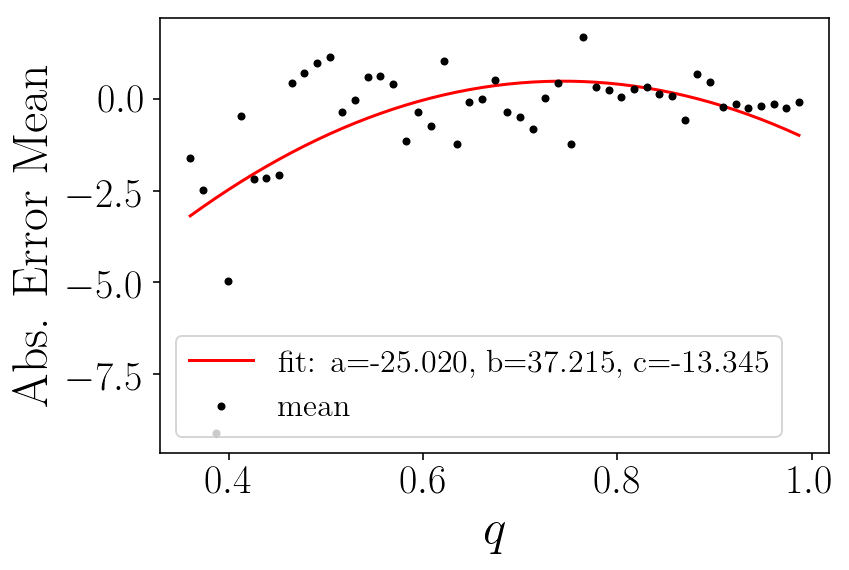

[-25.01972719  37.21542186 -13.34496773]


In [30]:
def FitFunc(x, a, b,c):
    return a*x*x+b*x+c
popt, pcov = curve_fit(FitFunc, qbin[:-3], Resqbinmean[:-2])
plt.plot(qbin[:-1], FitFunc(qbin[:-1], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(qbin[:-1], Resqbinmean,'.',color='k',label='mean')
#plt.axhline(np.mean(Resqbinmean[:-1]), label=str(np.mean(Resqbinmean[:-1])))
plt.legend()
plt.xlabel('$q$')
plt.ylabel('Abs. Error Mean')
plt.show()
print(popt)